pegando dados

In [320]:
import io, requests, pandas as pd, numpy as np
from bcb import sgs


In [321]:
m1 = sgs.get(27791, "2002-01-01").loc['2002-01-01':'2025-01-01']
m2 = sgs.get(27810, "2001-01-01").loc['2002-01-01':'2025-01-01']
m3 = sgs.get(27813, "2001-01-01").loc['2002-01-01':'2025-01-01']
m4 = sgs.get(27815, "2001-01-01").loc['2002-01-01':'2025-01-01']

In [322]:
display(m1,m2,m3,m4)

,27791
Date,
2002-01-01,76291521
2002-02-01,75679717
2002-03-01,74996003
2002-04-01,76628516
2002-05-01,75674168
...,...
2024-09-01,646946561
2024-10-01,624046032
2024-11-01,637926183


,27810
Date,
2002-01-01,3.172732e+08
2002-02-01,3.181512e+08
2002-03-01,3.271253e+08
2002-04-01,3.258067e+08
2002-05-01,3.281684e+08
...,...
2024-09-01,6.372576e+09
2024-10-01,6.418306e+09
2024-11-01,6.498143e+09


,27813
Date,
2002-01-01,6.286021e+08
2002-02-01,6.304995e+08
2002-03-01,6.421659e+08
2002-04-01,6.417692e+08
2002-05-01,6.418988e+08
...,...
2024-09-01,1.190576e+10
2024-10-01,1.196777e+10
2024-11-01,1.189621e+10


,27815
Date,
2002-01-01,754307152
2002-02-01,753801974
2002-03-01,758774257
2002-04-01,761658308
2002-05-01,762389232
...,...
2024-09-01,13150675220
2024-10-01,13265375595
2024-11-01,13350581346


In [323]:
pib = sgs.get(22099, "2002-01-01").loc['2002-01-01':'2025-01-01']

In [324]:
pib = pib.to_period('Q').to_timestamp('s')

In [325]:
pib

,22099
Date,
2002-01-01,110.63
2002-04-01,115.41
2002-07-01,119.50
2002-10-01,119.24
2003-01-01,113.58
...,...
2024-01-01,185.36
2024-04-01,190.43
2024-07-01,194.94


In [326]:
# temos o pib em trimestral e os agregados em mensal, vamos transformar os agregados em mensal para evitar inserir interpolação
#m1 = m1.resample('QE').mean().to_period("Q").to_timestamp("s")
#m2 = m2.resample('QE').mean().to_period("Q").to_timestamp("s")
#m3 = m3.resample('QE').mean().to_period("Q").to_timestamp("s")
#m4 = m4.resample('QE').mean().to_period("Q").to_timestamp("s")

In [327]:
# selic mensal base 252
selic = sgs.get(4189, "2002-01-01").loc['2002-01-01':'2025-01-01']
#selic = selic.resample('QE').mean().to_period("Q").to_timestamp("s")

In [328]:
selic

,4189
Date,
2002-01-01,19.05
2002-02-01,18.97
2002-03-01,18.72
2002-04-01,18.38
2002-05-01,18.37
...,...
2024-09-01,10.50
2024-10-01,10.65
2024-11-01,11.04


In [329]:
pib.index = pib.index.to_period("Q").to_timestamp("M")
pib_mensal = pib.resample("ME").interpolate(method="linear")
pib_mensal.index = pib_mensal.index.to_period("M").to_timestamp("S")
pib_mensal

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5572\2015239303.py:3: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  pib_mensal.index = pib_mensal.index.to_period("M").to_timestamp("S")


,22099
Date,
2002-01-01,110.630000
2002-02-01,112.223333
2002-03-01,113.816667
2002-04-01,115.410000
2002-05-01,116.773333
...,...
2024-09-01,191.320000
2024-10-01,189.510000
2024-11-01,189.890000


In [330]:
ipca = sgs.get(433, "2002-01-01").loc['2002-01-01':'2025-01-01']

In [331]:
ipca["fator"] = 1 + ipca["433"] / 100
ipca["indice_ipca"] = ipca["fator"].cumprod() * 100
ipca

,433,fator,indice_ipca
Date,,,
2002-01-01,0.52,1.0052,100.520000
2002-02-01,0.36,1.0036,100.881872
2002-03-01,0.60,1.0060,101.487163
2002-04-01,0.80,1.0080,102.299061
2002-05-01,0.21,1.0021,102.513889
...,...,...,...
2024-09-01,0.44,1.0044,386.022418
2024-10-01,0.56,1.0056,388.184144
2024-11-01,0.39,1.0039,389.698062


In [332]:
df = pd.merge(m1, m2, left_index=True, right_index=True).merge(m3, left_index=True, right_index=True).merge(m4, left_index=True, right_index=True).merge(pib_mensal, left_index=True, right_index=True).merge(selic, left_index=True, right_index=True).merge(ipca["indice_ipca"], left_index=True, right_index=True)
df = df.rename(columns={'27791': 'm1','22099': 'pib', '4189': 'selic', '27810': 'm2', '27813': 'm3', '27815': 'm4'})

In [333]:
df['m1'] = df['m1'] / 1000000 # está em unidades, vamos converter para milhões
df['m2'] = df['m2'] / 1000000
df['m3'] = df['m3'] / 1000000
df['m4'] = df['m4'] / 1000000
df['pib'] = df['pib'] * 1000 #está em bilhões, vamos converter para milhões

In [334]:
df

,m1,m2,m3,m4,pib,selic,indice_ipca
Date,,,,,,,
2002-01-01,76.291521,317.273183,628.602077,754.307152,110630.000000,19.05,100.520000
2002-02-01,75.679717,318.151239,630.499541,753.801974,112223.333333,18.97,100.881872
2002-03-01,74.996003,327.125313,642.165859,758.774257,113816.666667,18.72,101.487163
2002-04-01,76.628516,325.806655,641.769220,761.658308,115410.000000,18.38,102.299061
2002-05-01,75.674168,328.168352,641.898836,762.389232,116773.333333,18.37,102.513889
...,...,...,...,...,...,...,...
2024-09-01,646.946561,6372.576455,11905.756113,13150.675220,191320.000000,10.50,386.022418
2024-10-01,624.046032,6418.306026,11967.773663,13265.375595,189510.000000,10.65,388.184144
2024-11-01,637.926183,6498.143465,11896.214727,13350.581346,189890.000000,11.04,389.698062


rodando regressão


In [335]:
from statsmodels.api import OLS, add_constant
from statsmodels.stats.diagnostic import het_white

def run_model(df, target, features):
    # Definindo as variáveis para o modelo OLS
    X = add_constant(df[features])
    y = df[target]

    # Ajustando o modelo OLS
    model = OLS(y, X).fit()

    # Exibindo o resumo do modelo
    print(model.summary())

    # Executando o teste de White
    print("\n--- Resultados do Teste de White ---")
    teste_white = het_white(model.resid, model.model.exog)
    
    # Imprimindo os resultados
    print(f"Estatística do teste LM: {teste_white[0]:.4f}")
    print(f"Valor p (p-value): {teste_white[1]:.4f}")
    print(f"Estatística F: {teste_white[2]:.4f}")
    print(f"Valor p da estatística F: {teste_white[3]:.4f}")
    print("-" * 40)
    
    return model

In [336]:
model_m1 = run_model(df, 'm1', ['pib', 'selic'])
model_m2 = run_model(df, 'm2', ['pib', 'selic'])
model_m3 = run_model(df, 'm3', ['pib', 'selic'])
model_m4 = run_model(df, 'm4', ['pib', 'selic'])

                            OLS Regression Results                            
Dep. Variable:                     m1   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     342.4
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           2.98e-75
Time:                        20:58:08   Log-Likelihood:                -1648.2
No. Observations:                 277   AIC:                             3302.
Df Residuals:                     274   BIC:                             3313.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -758.4486     71.131    -10.663      0.0

In [337]:
# Criando defasagens da Selic
df["selic_lag1"] = df["selic"].shift(1)
df["selic_lag3"] = df["selic"].shift(3)
df["selic_lag6"] = df["selic"].shift(6)
df["selic_lag12"] = df["selic"].shift(12)


# Criando defasagens do PIB
df["pib_lag1"] = df["pib"].shift(1)
df["pib_lag3"] = df["pib"].shift(3)
df["pib_lag6"] = df["pib"].shift(6)
df["pib_lag12"] = df["pib"].shift(12)

df = df.dropna()

In [338]:
lags = [1, 3, 6, 12]

for lag in lags:
    X = df[[f"pib_lag{lag}", f"selic_lag{lag}"]].dropna()
    y = df["m2"]

    X = add_constant(X)
    model = OLS(y, X).fit()

    print(f"\n===== Resultados com defasagem {lag} meses =====")
    print(model.summary())



===== Resultados com defasagem 1 meses =====
                            OLS Regression Results                            
Dep. Variable:                     m2   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     270.2
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           2.13e-64
Time:                        20:58:08   Log-Likelihood:                -2189.5
No. Observations:                 265   AIC:                             4385.
Df Residuals:                     262   BIC:                             4396.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

In [339]:
# deflacionando
for col in ["pib", "m1", "m2", "m3", "m4"]:
    df[f"{col}_real"] = df[col] / df["indice_ipca"] * 100

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5572\608408546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{col}_real"] = df[col] / df["indice_ipca"] * 100
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5572\608408546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{col}_real"] = df[col] / df["indice_ipca"] * 100
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5572\608408546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [340]:
model_m1 = run_model(df, 'm1_real', ['pib_real', 'selic'])
model_m2 = run_model(df, 'm2_real', ['pib_real', 'selic'])
model_m3 = run_model(df, 'm3_real', ['pib_real', 'selic'])
model_m4 = run_model(df, 'm4_real', ['pib_real', 'selic'])

                            OLS Regression Results                            
Dep. Variable:                m1_real   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     262.0
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           3.12e-63
Time:                        20:58:08   Log-Likelihood:                -1134.4
No. Observations:                 265   AIC:                             2275.
Df Residuals:                     262   BIC:                             2286.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        228.1134      4.693     48.605      0.0

In [341]:
# converter tudo para unidades de reais (check) e ajustar o pib para o mensal para ter mais observações (check)
# deflacionar o pib, consultar a literatura
# testar defasagem também, rodar testes de autocorrelação e heterocedasticidade, e multicolinearidade

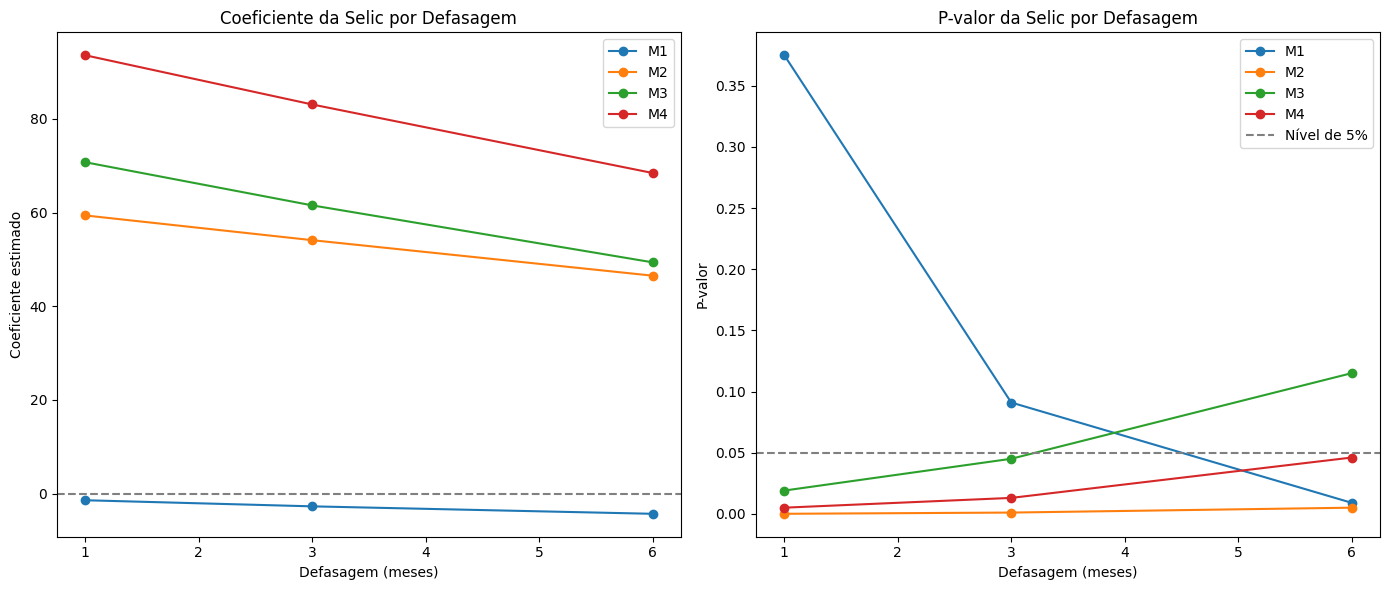

In [342]:
import matplotlib.pyplot as plt

# Defasagens analisadas
lags = [1, 3, 6]

# Resultados da regressão (exemplo com M1 já preenchido)
results = {
    "M1": {
        "coef": [-1.4036, -2.7073, -4.2968],
        "pval": [0.375, 0.091, 0.009]
    },
    "M2": {
        "coef": [59.3953, 54.1165, 46.5392],  # preencher com seus resultados
        "pval": [0.000, 0.001, 0.005]
    },
    "M3": {
        "coef": [70.7543, 61.5446, 49.3852],
        "pval": [0.019, 0.045, 0.115]
    },
    "M4": {
        "coef": [93.5906, 83.0890, 68.4581],
        "pval": [0.005, 0.013, 0.046]
    }
}

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Coeficientes
for m, vals in results.items():
    ax[0].plot(lags, vals["coef"], marker="o", label=m)

ax[0].axhline(0, color="gray", linestyle="--")
ax[0].set_title("Coeficiente da Selic por Defasagem")
ax[0].set_xlabel("Defasagem (meses)")
ax[0].set_ylabel("Coeficiente estimado")
ax[0].legend()

# Gráfico 2: P-valores
for m, vals in results.items():
    ax[1].plot(lags, vals["pval"], marker="o", label=m)

ax[1].axhline(0.05, color="gray", linestyle="--", label="Nível de 5%")
ax[1].set_title("P-valor da Selic por Defasagem")
ax[1].set_xlabel("Defasagem (meses)")
ax[1].set_ylabel("P-valor")
ax[1].legend()

plt.tight_layout()
plt.show()


In [343]:
# com a deflação, aplicar a técnica de defasagem se tornou praticamente irrelevante, considerando que já tenho os p-valores significativos, r2 alto e tudo mais
# porém nominalmente, os coeficientes necessitaram de um deflacionamento maior

In [344]:
# aplicando log pra ver o que que dá

In [345]:
df['log_m1'] = np.log(df['m1_real'])
df['log_m2'] = np.log(df['m2_real'])
df['log_m3'] = np.log(df['m3_real'])
df['log_m4'] = np.log(df['m4_real'])
df['log_pib'] = np.log(df['pib_real'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5572\3452296627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_m1'] = np.log(df['m1_real'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5572\3452296627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_m2'] = np.log(df['m2_real'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5572\3452296627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [346]:
df

,m1,m2,m3,m4,pib,selic,indice_ipca,selic_lag1,selic_lag3,selic_lag6,...,pib_real,m1_real,m2_real,m3_real,m4_real,log_m1,log_m2,log_m3,log_m4,log_pib
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,94.977783,391.237088,696.054502,810.272451,113580.000000,25.06,115.062270,23.03,19.59,18.17,...,98711.767404,82.544681,340.022050,604.937226,704.203431,4.413340,5.829010,6.405125,6.557067,11.499959
2003-02-01,93.602937,393.976058,706.788435,815.745074,114490.000000,25.68,116.868747,25.06,21.25,17.84,...,97964.599303,80.092359,337.109849,604.771123,698.001042,4.383180,5.820409,6.404850,6.548221,11.492361
2003-03-01,89.822584,388.142457,710.712013,820.859498,115400.000000,26.32,118.306233,25.68,23.03,17.89,...,97543.465954,75.923797,328.082847,600.739281,693.842985,4.329730,5.793266,6.398161,6.542246,11.488053
2003-04-01,87.410599,385.467653,712.800120,823.489095,116310.000000,26.32,119.453803,26.32,25.06,19.59,...,97368.184804,73.175233,322.691821,596.716136,689.378715,4.292857,5.776698,6.391442,6.535791,11.486255
2003-05-01,86.231763,388.490690,721.321334,833.412205,117623.333333,26.31,120.182472,26.32,25.68,21.25,...,97870.622743,71.750699,323.250708,600.188467,693.455705,4.273198,5.778428,6.397244,6.541687,11.491402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,646.946561,6372.576455,11905.756113,13150.675220,191320.000000,10.50,386.022418,10.40,10.40,11.00,...,49561.888373,167.593003,1650.830665,3084.213650,3406.712823,5.121538,7.409034,8.034052,8.133503,10.810977
2024-10-01,624.046032,6418.306026,11967.773663,13265.375595,189510.000000,10.65,388.184144,10.50,10.40,10.65,...,48819.613850,160.760310,1653.417876,3083.014558,3417.289400,5.079914,7.410600,8.033663,8.136603,10.795887
2024-11-01,637.926183,6498.143465,11896.214727,13350.581346,189890.000000,11.04,389.698062,10.65,10.40,10.46,...,48727.468408,163.697551,1667.481597,3052.674850,3425.878302,5.098021,7.419070,8.023773,8.139113,10.793998


In [347]:
model_m1 = run_model(df, 'log_m1', ['log_pib', 'selic'])
model_m2 = run_model(df, 'log_m2', ['log_pib', 'selic'])
model_m3 = run_model(df, 'log_m3', ['log_pib', 'selic'])
model_m4 = run_model(df, 'log_m4', ['log_pib', 'selic'])

                            OLS Regression Results                            
Dep. Variable:                 log_m1   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     295.8
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           6.38e-68
Time:                        20:58:08   Log-Likelihood:                 157.72
No. Observations:                 265   AIC:                            -309.4
Df Residuals:                     262   BIC:                            -298.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4969      0.401     23.662      0.0

<Axes: xlabel='Date', ylabel='log_m1'>

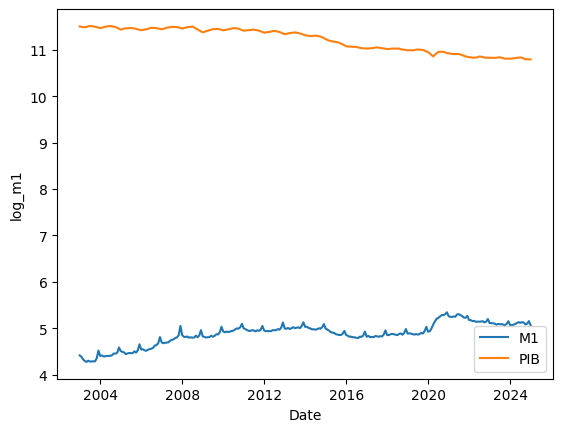

In [348]:
import seaborn as sns

sns.lineplot(x=df.index, y=df['log_m1'], label='M1')
sns.lineplot(x=df.index, y=df['log_pib'], label='PIB')

In [349]:
correlacao = df['log_m1'].corr(df['log_pib'])
correlacao

np.float64(-0.6570968741130855)

In [350]:
from statsmodels.stats.diagnostic import het_white
def testar_modelo_white(X, y, nome_modelo):
    """
    Ajusta um modelo OLS e executa o teste de White.

    Args:
        X (array): Variáveis independentes.
        y (array): Variável dependente.
        nome_modelo (str): Nome do modelo para identificação.
    """
    # Adiciona a constante ao X
    X = add_constant(X)
    
    # Ajusta o modelo OLS
    modelo_ols = OLS(y, X).fit()
    
    # Executa o teste de White
    teste_white = het_white(modelo_ols.resid, modelo_ols.model.exog)
    
    print(f"--- Resultados para o Modelo: {nome_modelo} ---")
    print(f"Estatística do teste LM: {teste_white[0]:.4f}")
    print(f"Valor p (p-value): {teste_white[1]:.4f}")
    print(f"Estatística F: {teste_white[2]:.4f}")
    print(f"Valor p da estatística F: {teste_white[3]:.4f}")
    print("-" * 40)